In [3]:
import pandas as pd
import numpy as np
import seaborn as sns 
import math
import matplotlib.pyplot as plt 
import os 

data_path = "D:\\Kaggle\\PulmonaryFibrosisProgression"
data_set = pd.read_csv(data_path + "\\train.csv")


In [19]:
data_set.describe()

,Weeks,FVC,Percent,Age
count,1549.000000,1549.000000,1549.000000,1549.000000
mean,31.861846,2690.479019,77.672654,67.188509
std,23.247550,832.770959,19.823261,7.057395
min,-5.000000,827.000000,28.877577,49.000000
25%,12.000000,2109.000000,62.832700,63.000000
50%,28.000000,2641.000000,75.676937,68.000000
75%,47.000000,3171.000000,88.621065,72.000000
max,133.000000,6399.000000,153.145378,88.000000


In [12]:
patient_list = data_set.Patient.unique()
print("Number of unique patient data: ", len(patient_list))


Number of unique patient data:  176


In [18]:
#Checking for null enteries in database
data_set[data_set.isnull().any(axis=1)].head()

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus


In [51]:
#Grouping Data by Patient ID for easy sorting

chunk_size = 200
chunk = data_set[0:chunk_size].copy()

grp = chunk.groupby(['Patient'])
grp_FVC = grp["FVC"].count().sort_values()
# print(grp.sort_values())


<AxesSubplot:xlabel='Patient', ylabel='FVC'>

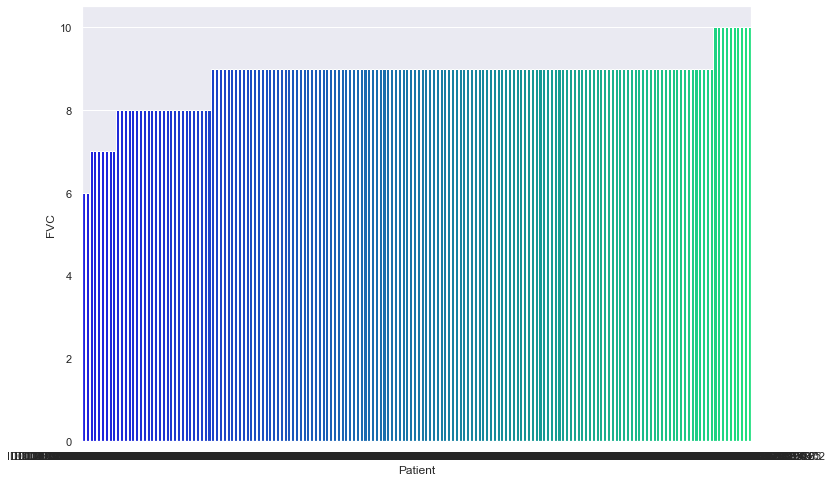

In [51]:
sns.set(rc={'figure.figsize':(12,8)})
sns.barplot(x=grp_FVC.index, y = grp_FVC, palette="winter")

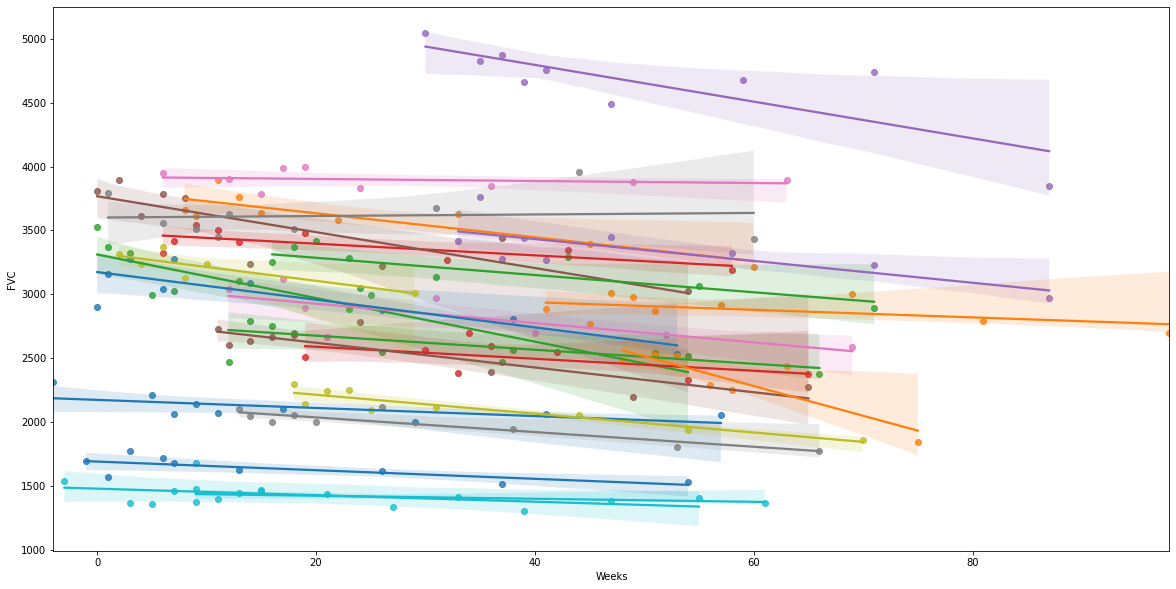

In [52]:
# sns.set(rc={'figure.figsize':(20,10 )})
f, ax = plt.subplots(figsize = [20,10])
for id, d in grp:
    ax = sns.regplot (x="Weeks", y="FVC", data = d)

